In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
df = pd.read_fwf('auto-mpg.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
df.shape

(398, 9)

In [4]:
df.columns = ['mpg','cylinders','disp','hrpwr','weight','accl','year', 'origin','name']

In [8]:
df.head()

,mpg,cylinders,disp,hrpwr,weight,accl,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


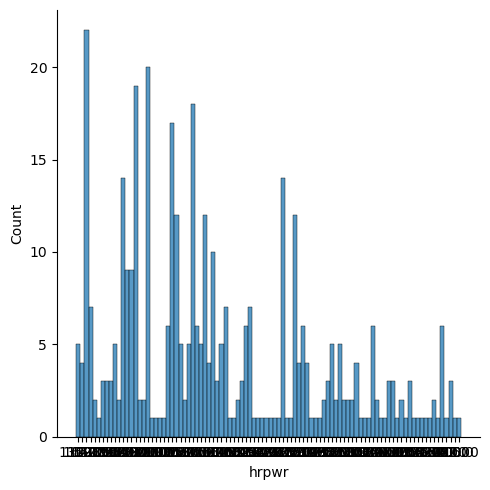

In [11]:
sns.displot(df['hrpwr'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        398 non-null    float64
 1   cylinders  398 non-null    int64  
 2   disp       398 non-null    float64
 3   hrpwr      398 non-null    object 
 4   weight     398 non-null    float64
 5   accl       398 non-null    float64
 6   year       398 non-null    int64  
 7   origin     398 non-null    int64  
 8   name       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
df[df['hrpwr']== '?']

,mpg,cylinders,disp,hrpwr,weight,accl,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [14]:
df = df[df['hrpwr'] != '?']

In [16]:
df['hrpwr'] = df['hrpwr'].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        392 non-null    float64
 1   cylinders  392 non-null    int64  
 2   disp       392 non-null    float64
 3   hrpwr      392 non-null    float64
 4   weight     392 non-null    float64
 5   accl       392 non-null    float64
 6   year       392 non-null    int64  
 7   origin     392 non-null    int64  
 8   name       392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [20]:
train, test = train_test_split(df, train_size = 0.7, random_state = 42)
train.shape, test.shape

((274, 9), (118, 9))

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mm_scaler = MinMaxScaler()


In [23]:
mm_scaler.fit(train[['hrpwr']])

MinMaxScaler()

In [24]:
mm_hrpwr = mm_scaler.transform(train[['hrpwr']])

In [26]:
train['hrpwr'].head()

110     94.0
17      85.0
320     92.0
24      90.0
128    100.0
Name: hrpwr, dtype: float64

In [27]:
mm_hrpwr[:5]

array([[0.25274725],
       [0.2032967 ],
       [0.24175824],
       [0.23076923],
       [0.28571429]])

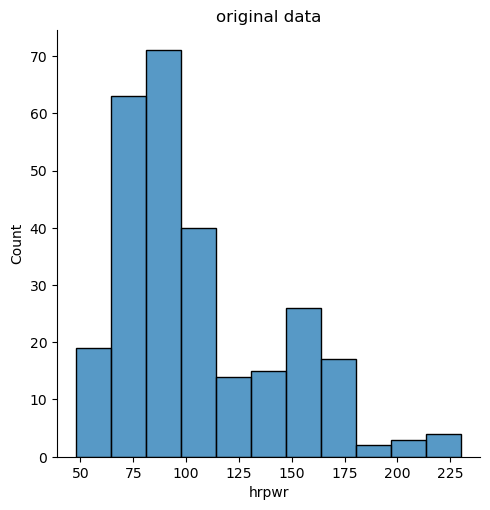

In [35]:

sns.displot(train['hrpwr'])
plt.title('original data')
plt.show()

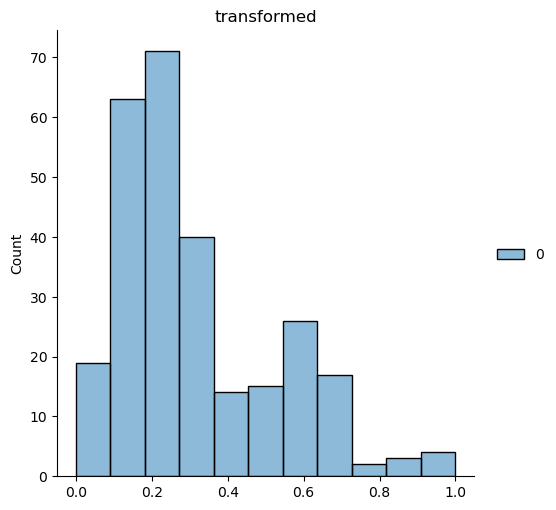

In [34]:

sns.displot(mm_hrpwr)
plt.title('transformed')

plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss_scaler = StandardScaler()

In [38]:
ss_scaler.fit(train[['hrpwr']])


StandardScaler()

In [39]:
ss_hrpwr = ss_scaler.transform(train[['hrpwr']])

In [40]:
ss_hrpwr[:5]

array([[-0.2723422 ],
       [-0.50646093],
       [-0.32436858],
       [-0.37639497],
       [-0.11626304]])

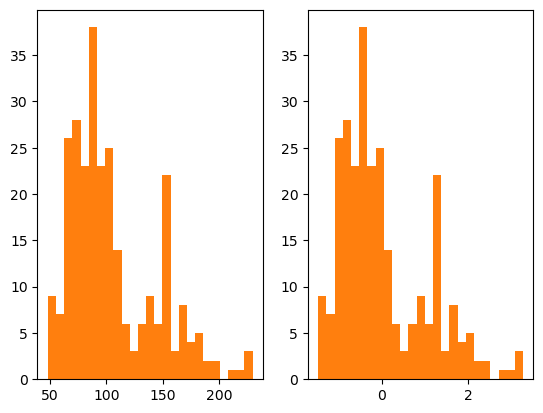

In [43]:
plt.subplot(121)
plt.hist(train['hrpwr'], bins = 25)

plt.subplot(122)
plt.hist(ss_hrpwr, bins = 25)

plt.show()

In [44]:
def compare_plots(transformed_data, original_data):
    
    plt.subplot(121)
    plt.hist(original_data, bins = 25)

    plt.subplot(122)
    plt.hist(transformed_data, bins = 25)

    plt.show()

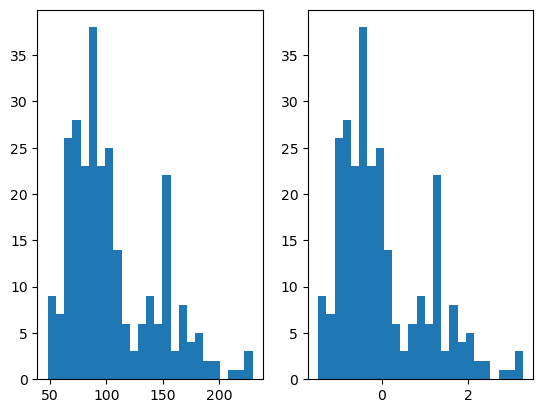

In [45]:
compare_plots(ss_hrpwr, train['hrpwr'])

In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
rs_scaler = RobustScaler()

In [48]:
rs_scaler.fit(train[['hrpwr']])

RobustScaler()

In [ ]:
rs_scaler.transform(train[['hrpwr']])